La BPI France dispose d'un fond d'investissement qu'elle voudrait utiliser pour investir dans les start'up de demain les plus prometteuses . Seulement elle ne sait pas comment les sélectionner. Faut -il investir dans celles qui dépensent le plus en marketing ? en recherche et développement ? <br> <br>
Dans quelles villes les startups semblent mieux opérer? Elle fait donc appel à vous pour y voir plus clair... <br> <br>
Concernant le notebook : En fournissant les budgets alloués aux différents pôles de travail, le modèle doit pouvoir prédire quel est le profit potentiel qui serait généré. Concernant le rapport écrit : une analyse construite , synthétique et méthodique. qui justifie l'utilisation d'une des approches de sélection de variables vues en séance et qui apporte des éléments de réponses aux questions de la BPI. <br> <br>
Vous devez donc concevoir un modèle de régression linéaire multiple qui permettra à la BPI d'une part de sélectionner les 5 start'up les plus prometteuses et d'autre part de déterminer dans quel(s) secteur(s) il serait le plus judicieux de répartir les budgets de dépenses. Le livrable se présentera sous forme d'un notebook python ET d'un rapport écrit synthétisant votre démarche de travail que vous justifierez par les résultats des différentes analyses que vous aurez effectuées. Vous comparerez vos résultats à ceux obtenus par le logiciel GRETL.

In [ ]:
#pip install statsmodels==0.6.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from scipy import stats

### <br>
### Visualisation des données.

In [ ]:
dataset = pd.read_csv(r'50_Startups.csv', sep = ';')
dataset.head()

,R&D,Administration,Marketing,villes,Profit
0,165349.20,136897.80,471784.10,Paris,192261.83
1,162597.70,151377.59,443898.53,Strasbourg,191792.06
2,153441.51,101145.55,407934.54,Lyon,191050.39
3,144372.41,118671.85,383199.62,Paris,182901.99
4,142107.34,91391.77,366168.42,Lyon,166187.94


### <br>
### Pas de valeurs manquantes.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   villes          50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.head()

,R&D,Administration,Marketing,villes,Profit
0,165349.20,136897.80,471784.10,Paris,192261.83
1,162597.70,151377.59,443898.53,Strasbourg,191792.06
2,153441.51,101145.55,407934.54,Lyon,191050.39
3,144372.41,118671.85,383199.62,Paris,182901.99
4,142107.34,91391.77,366168.42,Lyon,166187.94


### <br>
### On encode les villes en valeurs numériques.

In [ ]:
dataset['villes_codes'] = dataset['villes'].astype('category').cat.codes

In [ ]:
dataset[['villes','villes_codes']].head()

,villes,villes_codes
0,Paris,1
1,Strasbourg,2
2,Lyon,0
3,Paris,1
4,Lyon,0


### <br>
### On visualise les corrélations avec pairplot.

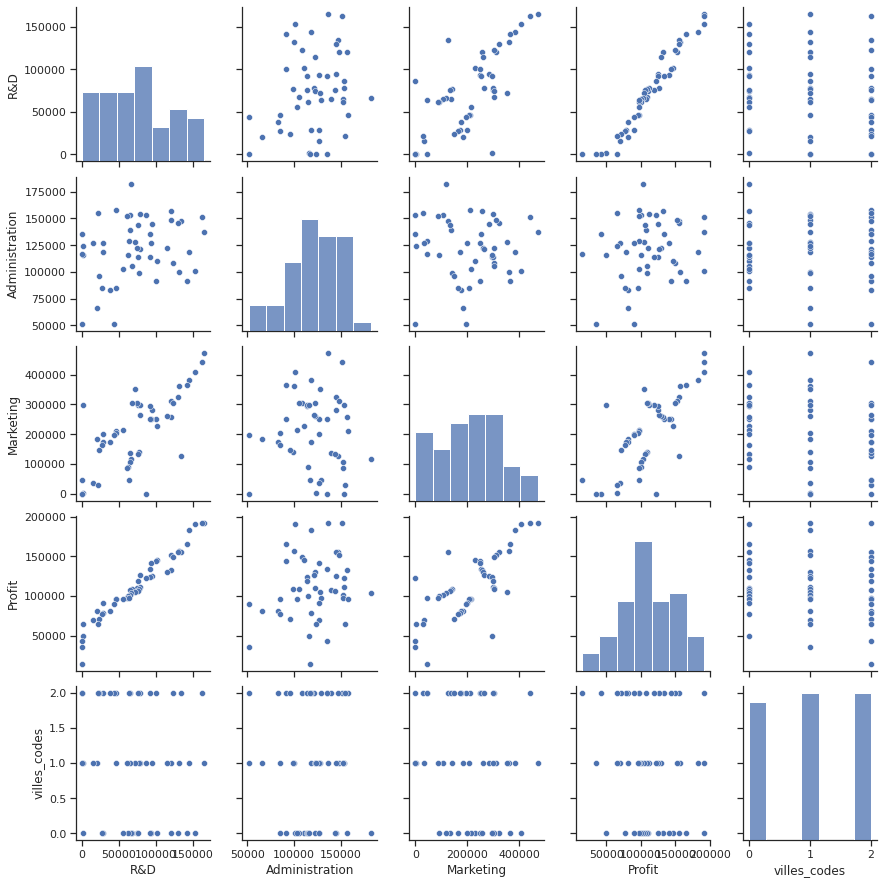

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(dataset)

### <br>
### On visualise les taux de corrélations avec heatmap.

<AxesSubplot:>

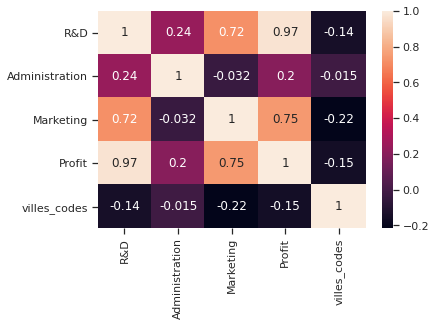

In [ ]:
sns.heatmap(dataset.corr(), annot = True)

On onserve une forte corrélation entre: <br>
RD et Profit <br>
RD et Marketing <br>
Marketing et Profit <br>

Pas de corrélation entre: <br>
RD et Administration <br>
Marketing et Administration <br>
Profit et Administration <br>


### <br>
### Les variables du jeu de données suivent une loi normale.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D', ylabel='Density'>

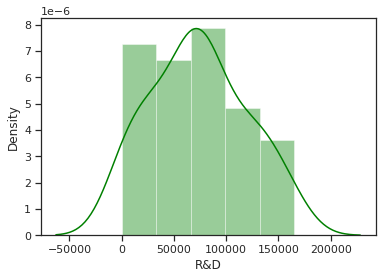

In [ ]:
sns.distplot(dataset['R&D'], color = 'green')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing', ylabel='Density'>

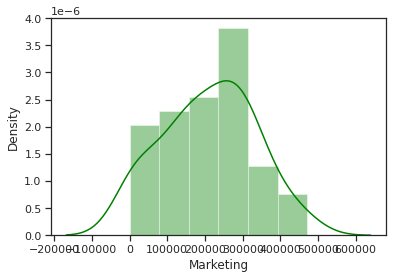

In [ ]:
sns.distplot(dataset['Marketing'], color = 'green')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

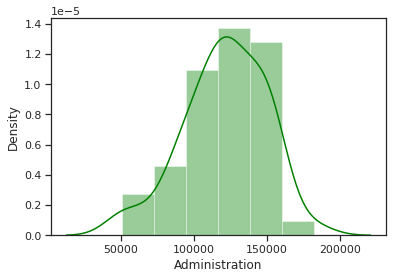

In [ ]:
sns.distplot(dataset['Administration'], color = 'green')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

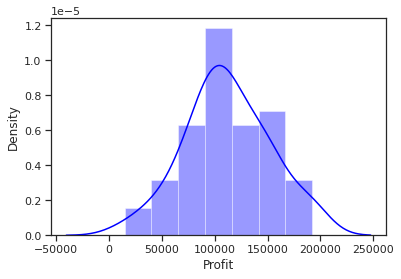

In [ ]:
sns.distplot(dataset['Profit'], color = 'blue')

### Backward regression pour enlever, au fur et à mesure, certaines variables dans le but de nous rapprocher de la p-value optimale : 0.05

In [ ]:
dataset.head()

,R&D,Administration,Marketing,villes,Profit,villes_codes
0,165349.20,136897.80,471784.10,Paris,192261.83,1
1,162597.70,151377.59,443898.53,Strasbourg,191792.06,2
2,153441.51,101145.55,407934.54,Lyon,191050.39,0
3,144372.41,118671.85,383199.62,Paris,182901.99,1
4,142107.34,91391.77,366168.42,Lyon,166187.94,0


#### <br>
#### On compare avec Gretl.

<img src="gretl_compare.png">

### Le R2 est le même.

In [ ]:

result = sm.ols(formula="Profit ~ Administration + Marketing + villes_codes + dataset[\"R&D\"]", data=dataset).fit()
print(result.params)
print(result.summary())

Intercept         50261.509753
Administration       -0.026913
Marketing             0.027065
villes_codes        -96.993190
dataset["R&D"]        0.805794
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           8.50e-29
Time:                        19:47:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err    

#### <br>
#### On constate que la variable villes_codes a un pvalue de 0.9, on choisit de l'enlever.

In [ ]:
result = sm.ols(formula="Profit ~ Administration + Marketing +  dataset[\"R&D\"]", data=dataset).fit()
print(result.params)
print(result.summary())

Intercept         50122.192990
Administration       -0.026816
Marketing             0.027228
dataset["R&D"]        0.805715
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        19:47:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025 

#### <br>
#### On enlève administration. 0n constate que la pvalue marketing est un peu au dessus de 0.05, cependant on choisit de la garder.

In [ ]:
result = sm.ols(formula="Profit ~  Marketing +  dataset[\"R&D\"]", data=dataset).fit()
print(result.params)
print(result.summary())

Intercept         46975.864221
Marketing             0.029908
dataset["R&D"]        0.796584
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        19:47:49   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### <br>
### On fait une régression linéaire multiple.

In [ ]:
X = dataset[['R&D', 'Marketing']]
y = dataset['Profit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1.0/3, random_state = 0)

In [ ]:

regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_train, y_train)

0.9544855917548343

#### On obtient R2 = 0.95.

In [ ]:
dataset

,R&D,Administration,Marketing,villes,Profit,villes_codes
0,165349.20,136897.80,471784.10,Paris,192261.83,1
1,162597.70,151377.59,443898.53,Strasbourg,191792.06,2
2,153441.51,101145.55,407934.54,Lyon,191050.39,0
3,144372.41,118671.85,383199.62,Paris,182901.99,1
4,142107.34,91391.77,366168.42,Lyon,166187.94,0
5,131876.90,99814.71,362861.36,Paris,156991.12,1
6,134615.46,147198.87,127716.82,Strasbourg,156122.51,2
7,130298.13,145530.06,323876.68,Lyon,155752.60,0
8,120542.52,148718.95,311613.29,Paris,152211.77,1
9,123334.88,108679.17,304981.62,Strasbourg,149759.96,2


#### <br>
#### On retrouve les coefficients de R&D et de Marketing. On remarque que celui de Marketing est bas : 0.02. 

In [ ]:
regressor.coef_

array([0.81924415, 0.02698594])

#### <br>
#### On visualise la régression multiple en 3D.

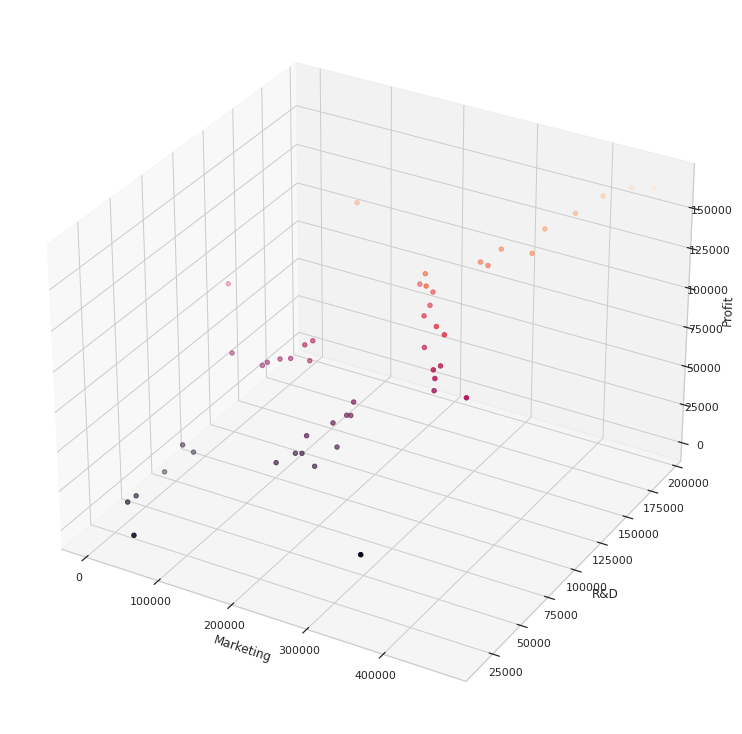

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,20))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = dataset['Marketing']
z = dataset['R&D']
y = dataset['Profit']


ax.scatter(x, y, z, c=z, marker='o')
ax.set_xlabel('Marketing')
ax.set_ylabel('R&D')
ax.set_zlabel('Profit')

plt.show()

### <br>
### On compare les prédictions avec la réalité.

In [ ]:

dataset['pred'] = dataset['R&D'] * regressor.coef_[0] + dataset['Marketing'] * regressor.coef_[1]
dataset

,R&D,Administration,Marketing,villes,Profit,villes_codes,pred
0,165349.20,136897.80,471784.10,Paris,192261.83,1,148192.901014
1,162597.70,151377.59,443898.53,Strasbourg,191792.06,2,145186.232491
2,153441.51,101145.55,407934.54,Lyon,191050.39,0,136714.555414
3,144372.41,118671.85,383199.62,Paris,182901.99,1,128617.253289
4,142107.34,91391.77,366168.42,Lyon,166187.94,0,126302.005046
5,131876.90,99814.71,362861.36,Paris,156991.12,1,117831.532807
6,134615.46,147198.87,127716.82,Strasbourg,156122.51,2,113729.486251
7,130298.13,145530.06,323876.68,Lyon,155752.60,0,115486.096589
8,120542.52,148718.95,311613.29,Paris,152211.77,1,107162.931089
9,123334.88,108679.17,304981.62,Strasbourg,149759.96,2,109271.593854


### <br>
### Prédiction du profit en fonction du R&D et marketing.

In [ ]:
formule = regressor.coef_[0]*int(input('Rentrez les dépenses en R&D ! ')) + regressor.coef_[1]*int(input('Rentrez les dépenses en marketing ! '))
print(formule)

19597.183221279556


### <br>
### Dans l'optique d'optimisation, on serait tentés par une régression simple en gardant seulement la variable R&D.

In [ ]:
dataset1 = dataset.copy(deep=True)
dataset1.drop(columns='Marketing', inplace=True)

In [ ]:


X = dataset1[['R&D']]
y = dataset1['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1.0/3, random_state = 0)

#### <br>
#### R2 avec marketing et R&D : 0.954485591754834 et R2 avec R&D : 0.9544855917548343

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_train, y_train)

0.9512952416344765

#### La différence est : -2.220446049250313e-16

In [ ]:
diff = 0.954485591754834 - 0.9544855917548343
diff

### <br>
### On visualise la corrélation entre profit et R&D.

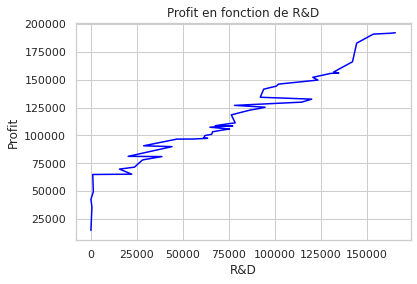

In [ ]:
plt.plot(dataset1.iloc[:,0], dataset1.iloc[:, 3], color = 'blue')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('Profit en fonction de R&D')
plt.grid()

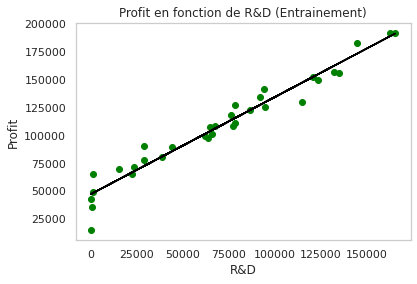

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Profit en fonction de R&D (Entrainement)')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.grid(color='white', linestyle='-.', linewidth=0.7)
plt.show()


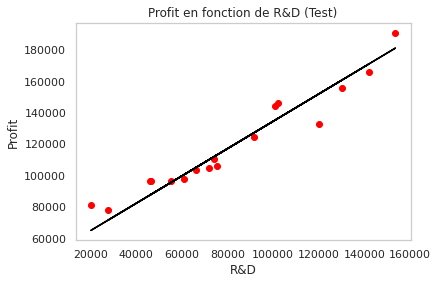

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'black')
plt.title('Profit en fonction de R&D (Test)')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.grid(color = 'white', linestyle='-.', linewidth=0.7)
plt.show()


### Conclusion : à partir du jeu de données des 50 startups, on peut prédire le profit en fonction de la R&D avec un taux de probabilité de 95%.